In [14]:
# Import required libraries
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [16]:
# Define folder path to your CSV files and month mapping
folder_path = "/Users/vivek/Downloads/Tweets" 
month_map = {
    "TweetIDs_November.csv": "November",
    "TweetIDs_December.csv": "December",
    "TweetIDs_January.csv": "January",
    "TweetIDs_February.csv": "February",
    "TweetIDs_March.csv": "March",
    "TweetIDs_April.csv": "April",
    "TweetIDs_May.csv": "May"
}


In [18]:
# Get all CSV file paths in the folder and display them for debugging
file_paths = glob.glob(folder_path + "/*.csv")
print("Files found:", file_paths)  # Debugging line to check files

# Verify if files were detected
if not file_paths:
    print("No CSV files found in the specified folder. Please check the folder path and try again.")


Files found: ['/Users/vivek/Downloads/Tweets/TweetIDs_March.csv', '/Users/vivek/Downloads/Tweets/TweetIDs_May.csv', '/Users/vivek/Downloads/Tweets/TweetIDs_February.csv', '/Users/vivek/Downloads/Tweets/TweetIDs_January.csv', '/Users/vivek/Downloads/Tweets/TweetIDs_December.csv', '/Users/vivek/Downloads/Tweets/TweetIDs_April.csv', '/Users/vivek/Downloads/Tweets/TweetIDs_November.csv']


In [20]:
# Load each CSV file, add a 'month' column, and combine them
dfs = []
for file_path in file_paths:
    file_name = os.path.basename(file_path)  
    month = month_map.get(file_name, None)
    
    if month:
        # Try reading the CSV file and display the first few rows to confirm contents
        df = pd.read_csv(file_path)
        if df.empty:
            print(f"Warning: {file_name} is empty. Skipping.")
        else:
            print(f"Loaded {file_name} with shape: {df.shape}")
            df['month'] = month  # Add month column
            dfs.append(df)
    else:
        print(f"Warning: {file_name} not found in month map. Skipping.")

# Concatenate DataFrames if any files were successfully loaded
if dfs:
    tweets_df = pd.concat(dfs, ignore_index=True)
    print("Data loaded successfully with shape:", tweets_df.shape)
else:
    print("No DataFrames to concatenate. Check if CSV files are empty or improperly formatted.")


Loaded TweetIDs_March.csv with shape: (88826, 35)
Loaded TweetIDs_May.csv with shape: (32430, 35)
Loaded TweetIDs_February.csv with shape: (81775, 35)
Loaded TweetIDs_January.csv with shape: (86263, 35)
Loaded TweetIDs_December.csv with shape: (92685, 35)
Loaded TweetIDs_April.csv with shape: (83366, 35)
Loaded TweetIDs_November.csv with shape: (15262, 35)
Data loaded successfully with shape: (480607, 36)


In [22]:
# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to categorize sentiment
def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    if score['compound'] >= 0.05:
        return 'Positive'
    elif score['compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis and add 'sentiment' column
if 'text' in tweets_df.columns:
    tweets_df['sentiment'] = tweets_df['text'].apply(get_sentiment)
    print("Sentiment analysis completed.")
else:
    print("Error: 'text' column not found in the loaded data.")


Sentiment analysis completed.


In [24]:
# Define colors for each sentiment
colors = {
    'Positive': '#66c2a5',  # Green
    'Negative': '#fc8d62',  # Red
    'Neutral': '#8da0cb'    # Blue
}

# Function to create and save pie charts for each month
def plot_sentiment_distribution(month, data):
    # Get sentiment counts for the specific month
    sentiment_counts = data['sentiment'].value_counts()
    
    # Define colors for the current pie chart based on sentiment order
    pie_colors = [colors[sentiment] for sentiment in sentiment_counts.index]
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        sentiment_counts,
        labels=sentiment_counts.index,
        autopct='%1.1f%%',
        startangle=140,
        colors=pie_colors
    )
    plt.title(f'Sentiment Distribution for {month}')
    
    # Save plot as PNG
    plt.savefig(f'sentiment_distribution_{month}_pie.png')
    plt.show()  # Show the plot


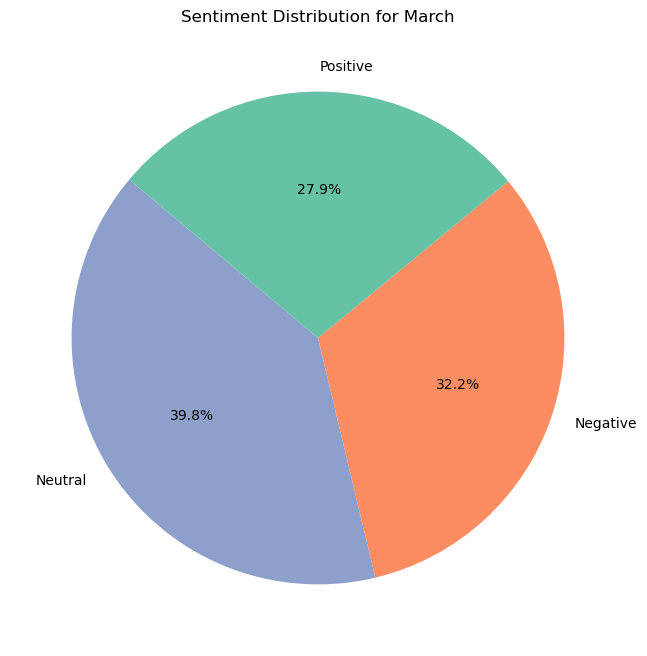

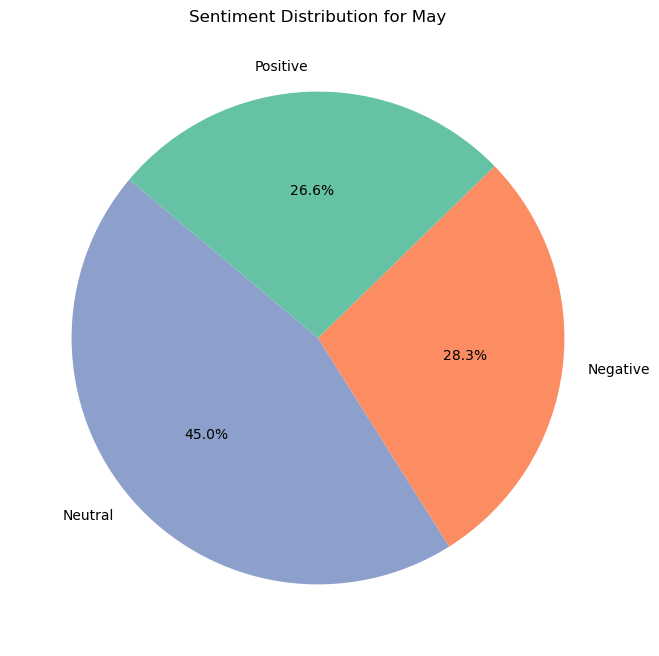

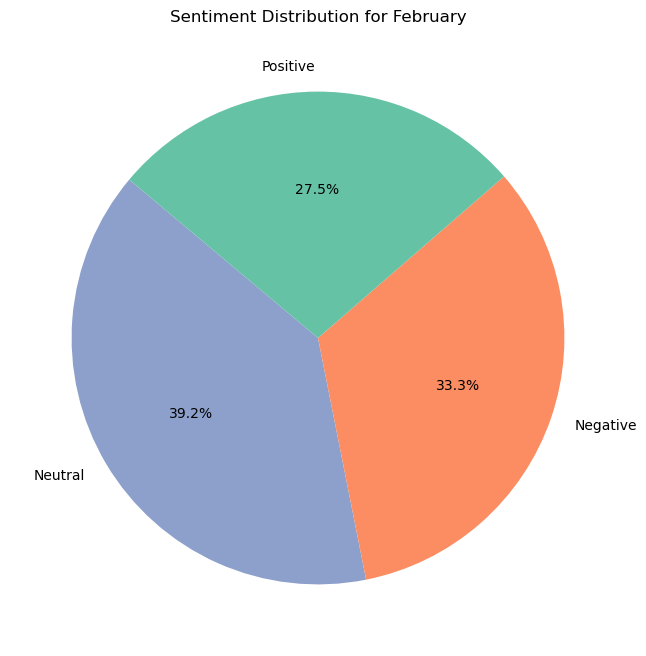

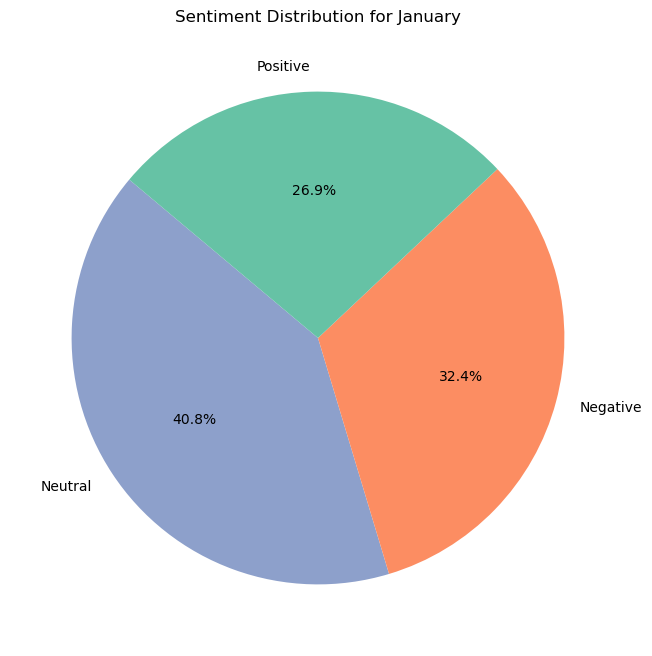

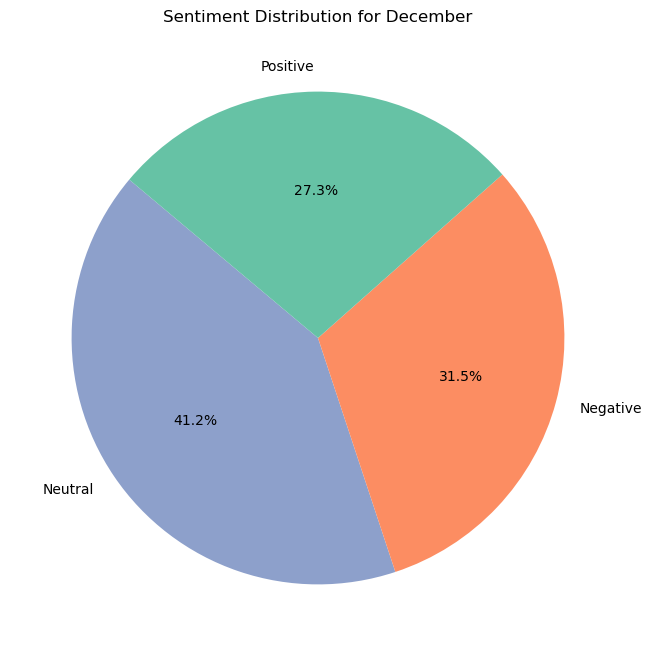

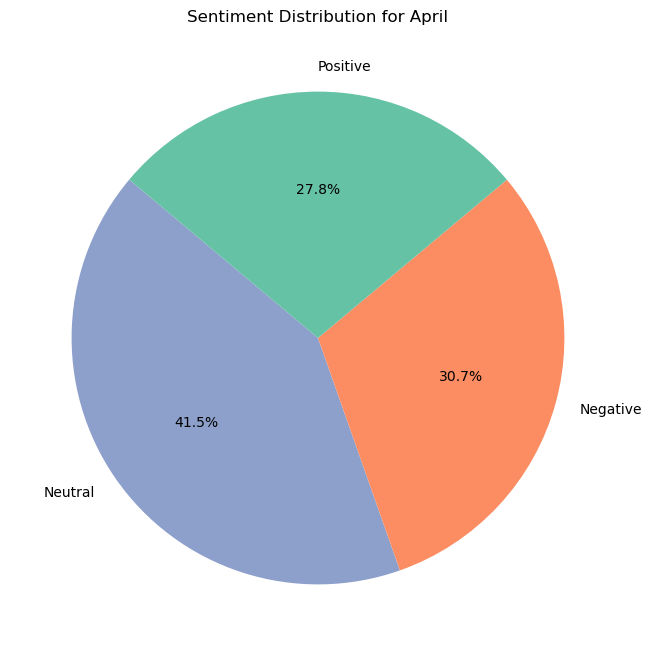

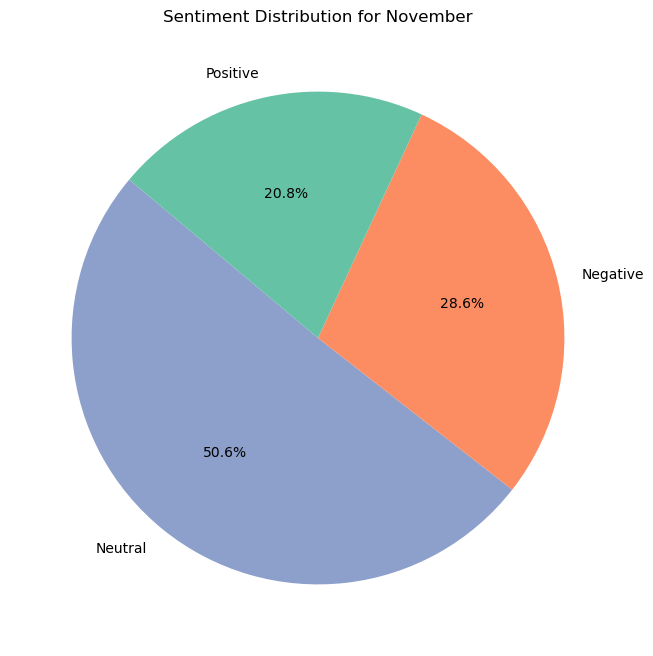

In [26]:
# Generate and display/save pie charts for each month
if 'month' in tweets_df.columns and 'sentiment' in tweets_df.columns:
    for month in tweets_df['month'].unique():
        # Filter data for the specific month
        month_data = tweets_df[tweets_df['month'] == month]
        plot_sentiment_distribution(month, month_data)
else:
    print("Error: Required columns 'month' and/or 'sentiment' not found in the data.")
